In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [75]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [76]:
df.columns=["Month","Sales"]

In [77]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [79]:
# there is one null value in sales columns and month data also niot in datetime format

In [80]:
df.dropna(axis=0,inplace=True)

In [81]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [82]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [83]:
df['Month']=pd.to_datetime(df.Month)

In [84]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [86]:
# Now we are ready to go

<AxesSubplot:>

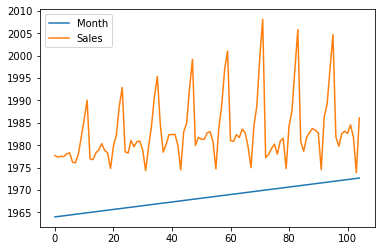

In [87]:
df.plot()

In [88]:
df.set_index("Month",drop=True,inplace =True)

In [89]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [90]:
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.0,2554.0,1413.0,3113.0,4217.0,5221.0,13916.0


<AxesSubplot:xlabel='Month'>

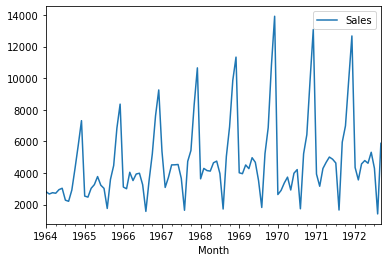

In [91]:
df.plot()

In [92]:
# This data Looks Saeasonal..Lets check it out byb doing some statistical test

# Testing for stationarity

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [95]:
adfuller_test(df.Sales)

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [96]:
df['first_diff_sales']= df.Sales- df.Sales.shift(1)

In [97]:
df.head()

,Sales,first_diff_sales
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [98]:
df['sea_diff_sales']= df.Sales- df.Sales.shift(12)

In [99]:
df.head(14)

,Sales,first_diff_sales,sea_diff_sales
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [100]:
adfuller_test(df['sea_diff_sales'].dropna())

ADF Test Statistic : -7.626619157213162
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

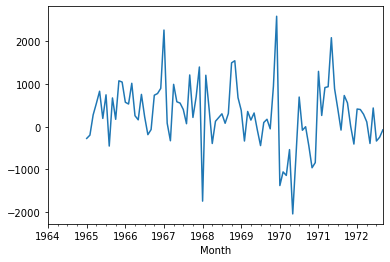

In [101]:
df['sea_diff_sales'].plot()

# Auto Regressive Model

In [103]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


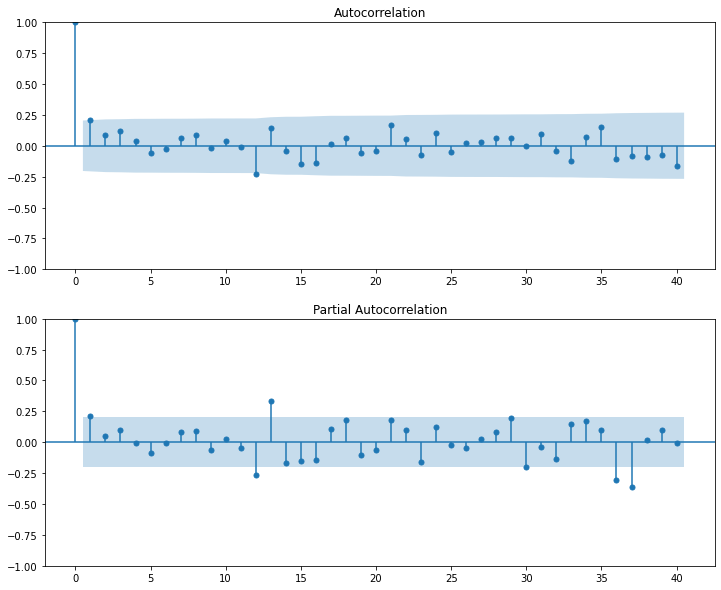

In [107]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['sea_diff_sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['sea_diff_sales'].iloc[13:],lags=40,ax=ax2)

here we can p & q value as 1,1

In [118]:
# For non seasonal Data
from statsmodels.tsa.arima.model import ARIMA

In [119]:
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:

model_fit=model.fit()

In [121]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 05 Jan 2023   AIC                           1911.627
Time:                        13:04:51   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.000      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.318      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

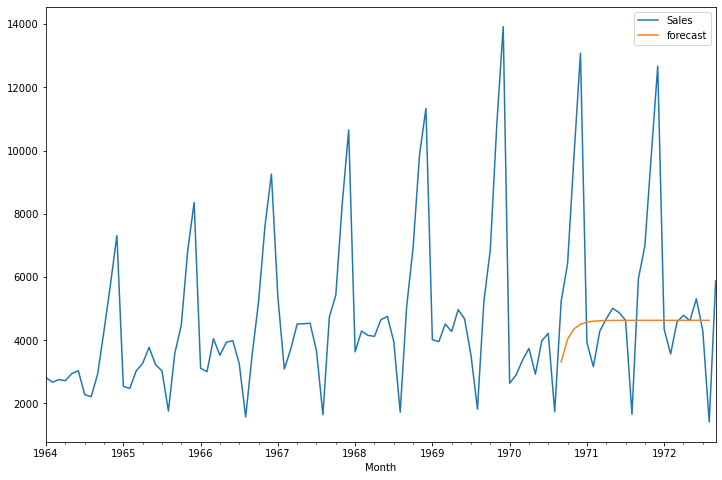

In [122]:
df['forecast']=model_fit.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [123]:
import statsmodels.api as sm

In [124]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

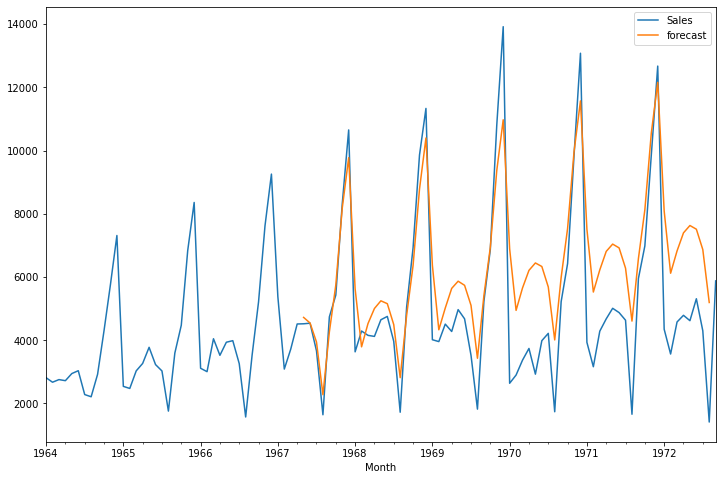

In [126]:
df['forecast']=results.predict(start=40,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [145]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [146]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [147]:
future_datest_df.tail()

,Sales,first_diff_sales,sea_diff_sales,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [148]:
future_df=pd.concat([df,future_datest_df])

In [149]:
future_df.shape

(128, 4)

<AxesSubplot:>

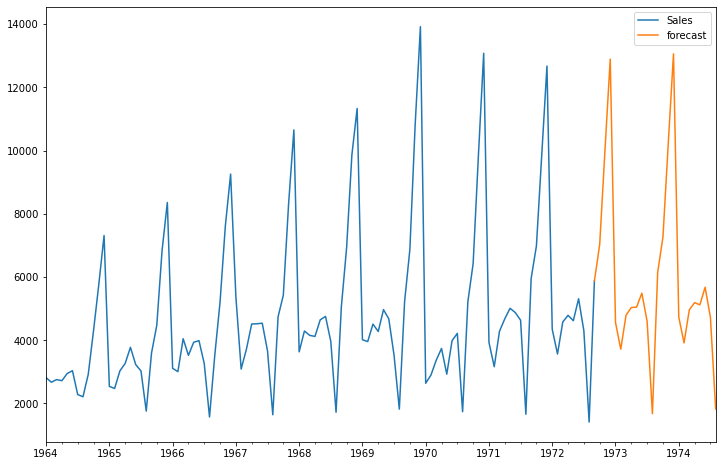

In [150]:
future_df['forecast'] = results.predict(start = 104,end=340, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 